# 1. Data Exploration

***This section is only required if used as example.***

In this section commonly used cardiovascular disease data is read from the given CSV files.
These files contain classified data of 87554 ECG measurements.
The measurements are classified as being healthy or having one of the four tested heart conditions.
A healthy heart measurement will have a 0 in the final column, while the four heart diseases will have a 1, 2, 3 or 4.

1 will be classified as 'Supraventricular premature beat'  
2 will be classified as 'Premature ventricular contraction'  
3 will be classified as 'Fusion of ventricular and normal beat'  
4 will be classified as 'Unclassifiable beat'

After loading, the data will be plotted as a visual aid.

### 1.1 Load data

In [1]:
# import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# check if a GPU is present

import tensorflow as tf; print(tf.__version__)  
tf.config.list_physical_devices('GPU')
tf.compat.v1.disable_v2_behavior()
tf.compat.v1.enable_eager_execution()

2.8.0
Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
# import the CSV files

mitbih_test = pd.read_csv("./data/mitbih_test.csv", header=None)
mitbih_train = pd.read_csv("./data/mitbih_train.csv", header=None)
mitbih_train.shape

(87554, 188)

### 1.2 Explore data

In [4]:
# look at the first 10 records of the training file

mitbih_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.423611,0.791667,1.000000,0.256944,0.000000,0.277778,0.465278,0.520833,0.472222,0.555556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.716814,0.539823,0.283186,0.129794,0.064897,0.076696,0.026549,0.032448,0.008850,0.044248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.874214,0.849057,0.480084,0.058700,0.090147,0.310273,0.387841,0.385744,0.389937,0.392034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,0.996086,0.694716,0.336595,0.238748,0.268102,0.191781,0.174168,0.164384,0.187867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


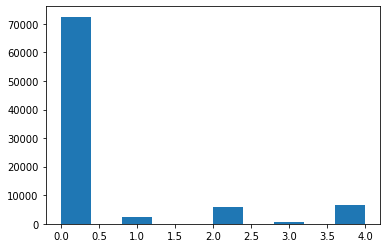

In [5]:
# plot the distribution of the classes

plot1 = plt.hist(mitbih_train.iloc[:, -1])

Given in dataset:
<br>Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

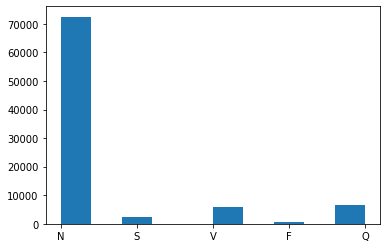

In [6]:
# the same data as the previous plot, but with a class label on the x-axis.

labels = {0 : 'N', 1 : 'S', 2 : 'V', 3 : 'F', 4 : 'Q'} 
labels = mitbih_train.iloc[:,-1].replace(labels)
plot2 = plt.hist(labels)

### 1.3 Example plot

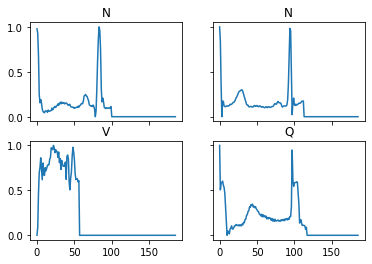

In [7]:
# 4 plots will be made to visualize the data of record 0, 11111, 80000 and 85000.
# These records where chosen because they are classified as a different class.

fig, coor = plt.subplots(2, 2)

coor[0, 0].plot(mitbih_train.iloc[0,:-2])
coor[0, 0].set_title(labels.iloc[0])

coor[0, 1].plot(mitbih_train.iloc[11111,:-2])
coor[0, 1].set_title(labels.iloc[11111])

coor[1, 0].plot(mitbih_train.iloc[80000,:-2])
coor[1, 0].set_title(labels.iloc[80000])

coor[1, 1].plot(mitbih_train.iloc[85000,:-2])
coor[1, 1].set_title(labels.iloc[85000])

for ax in coor.flat:
    ax.label_outer()

# 2. Creating Model

***This section is only required if used as example OR no model is made for the user's data.***

In this section a model will be created by using the given data.
If there is no data and this section is only being run as an example, section 1 will have to run first so it can generate example data.
Otherwise section 2.1 can be run with the replacement values, so personal data will be used.
The next section will expect the model to take all the 187 points of measurement as input, and 5 values (one per class) as output.

### 2.1 Choose data

***ONLY run this section if data other than the example data will be used.***

Change the example location to the right file location and change the labels in the required classes (this can make the list larger or smaller).

In [ ]:
mitbih_train = pd.read_csv("./data/mitbih_train.csv", header=None)
mitbih_test = pd.read_csv("./data/mitbih_test.csv", header=None)
labels = {0 : 'N', 1 : 'S', 2 : 'V', 3 : 'F', 4 : 'Q'}

### 2.2 Creating model

In [7]:
# import the necessary libraries

from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
import sklearn
import itertools
from tensorflow_addons.optimizers import CyclicalLearningRate
from tensorflow.keras.callbacks import ModelCheckpoint

In [8]:
# split the data in input and output for the training and testing data 
# and keep some data seperate for validation (testing while tuning)

X_mitbih_train, X_mitbih_val, y_mitbih_train, y_mitbih_val = train_test_split(mitbih_train.iloc[:,:-1].values, mitbih_train.iloc[:,-1].values, test_size=0.1, random_state=42)
X_mitbih_test = mitbih_test.iloc[:,:-1].values
y_mitbih_test = mitbih_test.iloc[:,-1].values

X_mitbihl_train = np.expand_dims(X_mitbih_train, -1)
y_mitbihl_train = np.expand_dims(y_mitbih_train, -1)
X_mitbihl_val = np.expand_dims(X_mitbih_val, -1)
y_mitbihl_val = np.expand_dims(y_mitbih_val, -1)
X_mitbihl_test = np.expand_dims(X_mitbih_test, -1)
y_mitbihl_test = np.expand_dims(y_mitbih_test, -1)

In [13]:
# build the model using one dimensional convolution layers and ReLU activation functions
# this may not get the best results, this is only used as an example
# further fine-tuning is out of scope

def get_resnet_model(categories=2):
  def residual_block(X, kernels, stride):
    out = keras.layers.Conv1D(kernels, stride, padding='same')(X)
    out = keras.layers.ReLU()(out)
    out = keras.layers.Conv1D(kernels, stride, padding='same')(out)
    out = keras.layers.add([X, out])
    out = keras.layers.ReLU()(out)
    out = keras.layers.MaxPool1D(5, 2)(out)
    return out

  kernels = 32
  stride = 5

  inputs = keras.layers.Input([187,1])
  X = keras.layers.Conv1D(kernels, stride)(inputs)
  X = residual_block(X, kernels, stride)
  X = residual_block(X, kernels, stride)
  X = residual_block(X, kernels, stride)
  X = residual_block(X, kernels, stride)
  X = residual_block(X, kernels, stride)
  X = keras.layers.Flatten()(X)
  X = keras.layers.Dense(32, activation='relu')(X)
  X = keras.layers.Dense(32, activation='relu')(X)
  output = (keras.layers.Dense(1, activation='sigmoid')(X) if categories == 2 else keras.layers.Dense(categories, activation='softmax')(X))
  model = tf.keras.Sequential
  model = tf.keras.Model(inputs=inputs, outputs=output)
  return model

In [11]:
# a learning rate tracker
# this will show how the output of the loss function changed as the learning rate changes
# the right learning rate can than be picked

from tensorflow.keras.callbacks import Callback

class LRFinder(Callback):
    """`Callback` that exponentially adjusts the learning rate after each training batch between `start_lr` and
    `end_lr` for a maximum number of batches: `max_step`. The loss and learning rate are recorded at each step allowing
    visually finding a good learning rate as per https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html via
    the `plot` method.
    """

    def __init__(self, start_lr: float = 1e-7, end_lr: float = 10, max_steps: int = 100, smoothing=0.9):
        super(LRFinder, self).__init__()
        self.start_lr, self.end_lr = start_lr, end_lr
        self.max_steps = max_steps
        self.smoothing = smoothing
        self.step, self.best_loss, self.avg_loss, self.lr = 0, 0, 0, 0
        self.lrs, self.losses = [], []

    def on_train_begin(self, logs=None):
        self.step, self.best_loss, self.avg_loss, self.lr = 0, 0, 0, 0
        self.lrs, self.losses = [], []

    def on_train_batch_begin(self, batch, logs=None):
        self.lr = self.exp_annealing(self.step)
        tf.keras.backend.set_value(self.model.optimizer.lr, self.lr)

    def on_train_batch_end(self, batch, logs=None):
        logs = logs or {}
        loss = logs.get('loss')
        step = self.step
        if loss:
            self.avg_loss = self.smoothing * self.avg_loss + (1 - self.smoothing) * loss
            smooth_loss = self.avg_loss / (1 - self.smoothing ** (self.step + 1))
            self.losses.append(smooth_loss)
            self.lrs.append(self.lr)

            if step == 0 or loss < self.best_loss:
                self.best_loss = loss

            if smooth_loss > 4 * self.best_loss or tf.math.is_nan(smooth_loss):
                self.model.stop_training = True

        if step == self.max_steps:
            self.model.stop_training = True

        self.step += 1

    def exp_annealing(self, step):
        return self.start_lr * (self.end_lr / self.start_lr) ** (step * 1. / self.max_steps)

    def plot(self):
        fig, ax = plt.subplots(1, 1)
        ax.set_ylabel('Loss')
        ax.set_xlabel('Learning Rate (log scale)')
        ax.set_xscale('log')
        ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0e'))
        ax.plot(self.lrs, self.losses)

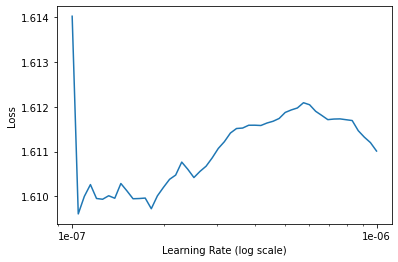

In [14]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model = get_resnet_model(5) 
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

lr_finder = LRFinder(start_lr=1e-7, end_lr= 1e-06, max_steps=50, smoothing=0.6)
_ = model.fit(X_mitbihl_train, y_mitbihl_train, batch_size=256, epochs=5, callbacks=[lr_finder], verbose=False)
lr_finder.plot()

### 2.3 Training Model

In [26]:
# the model will be trained on the given data
# this can take some time
# if used as an example the epochs can be lowered
# this will give a less optimal result but will execute faster

N = X_mitbihl_train.shape[0]
batch_size = 128
iterations = N/batch_size
step_size= 2 * iterations
label_num = len(labels)
epochs=10

def scale_fn(x):
    return tf.pow(0.95,x)

lr_schedule = CyclicalLearningRate(1e-5, 1e-3, step_size=step_size, scale_fn=scale_fn )
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
m_resnet_model = get_resnet_model(label_num)

save_best_weights = ModelCheckpoint(filepath="weights.hdf5", verbose=0, save_best_only=True)

m_resnet_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = m_resnet_model.fit(X_mitbihl_train, y_mitbihl_train, validation_data=(X_mitbihl_val, y_mitbihl_val), 
                             shuffle=True, batch_size=128, epochs, callbacks=[save_best_weights])

Epoch 1/10
616/616 [==============================] - 7s 11ms/step - loss: 0.4912 - accuracy: 0.8828 - val_loss: 0.2139 - val_accuracy: 0.9410
Epoch 2/10
616/616 [==============================] - 6s 11ms/step - loss: 0.1716 - accuracy: 0.9521 - val_loss: 0.1439 - val_accuracy: 0.9596
Epoch 3/10
616/616 [==============================] - 6s 10ms/step - loss: 0.1137 - accuracy: 0.9695 - val_loss: 0.0988 - val_accuracy: 0.9738
Epoch 4/10
616/616 [==============================] - 7s 11ms/step - loss: 0.0786 - accuracy: 0.9779 - val_loss: 0.0794 - val_accuracy: 0.9789
Epoch 5/10
616/616 [==============================] - 7s 11ms/step - loss: 0.0726 - accuracy: 0.9797 - val_loss: 0.0819 - val_accuracy: 0.9773
Epoch 6/10
616/616 [==============================] - 6s 10ms/step - loss: 0.0851 - accuracy: 0.9769 - val_loss: 0.1120 - val_accuracy: 0.9709
Epoch 7/10
616/616 [==============================] - 7s 11ms/step - loss: 0.0744 - accuracy: 0.9794 - val_loss: 0.0689 - val_accuracy: 0.9822

### 2.4 Saving Model

In [6]:
m_resnet_model.save('demomodel.h5')

X_mitbih_test = m_resnet_model.evaluate(X_mitbihl_test, y_mitbihl_test)

NameError: name 'm_resnet_model' is not defined

# 3. explain model

### 3.1 Loading Model

***ONLY run this section if a model other than the example model will be used OR the example model is not in memory***

If section 2 was not executed, the demomodel file can be used by executing this section and not changing the parameters.

In [ ]:
file = 'demomodel.h5'

def scale_fn(x):
    return tf.pow(0.95,x)
m_resnet_model = tf.keras.models.load_model(file, custom_objects={"scale_fn": scale_fn})

### 3.2 Confusion Matrix

The confusion matrix will show the biases that a model has.
For every label the matrix can show how many times the model was right and how many times the model gave another label as output.
In the case of the automatic ECG cardiovascular disease classifier the most important fields to compare are the normal cases (N) and the other cases (S, V, F and Q).
It is better that a model predicts that there is something wrong, but gives the wrong class.
Than the model predicting that the class is normal, but a dangerous disease is present.
The better models will therefore have low numbers in the leftmost column, apart from the true normal field.

In [10]:
# create the function that plots the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

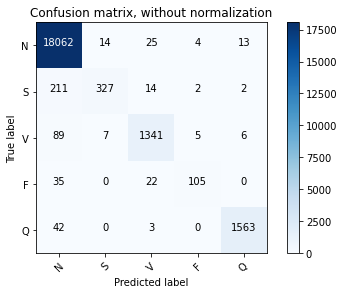

In [11]:
# get all the predictions for the test data
# use the predictions and the actual values to create the confusion matrix

y_pred = tf.argmax(m_resnet_model.predict(X_mitbihl_test), axis=-1)
# Compute confusion matrix
cnf_matrix = sklearn.metrics.confusion_matrix(y_mitbih_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],
                      title='Confusion matrix, without normalization')

### 3.3 Certainty

In [12]:
# give the certainty values for each label for one sample

labels = {0 : 'N', 1 : 'S', 2 : 'V', 3 : 'F', 4 : 'Q'} 

SAMPLENUMBER = 20000
sample = X_mitbihl_test[SAMPLENUMBER]
sample = np.expand_dims(sample, axis=0)
output = m_resnet_model.predict(sample)
for i in range(5):
    print("class {} certainty: {}%".format(labels.get(i), round(output[0][i] * 1000) / 10))

class N certainty: 1.4%
class S certainty: 1.1%
class V certainty: 95.0%
class F certainty: 2.2%
class Q certainty: 0.2%


### 3.4 SHAP

SHAP is a tool that can dissect a model and show the inner workings using graphs.
It will use the inputs and give each a score to show the importance.
This calculation is done by slightly changing those values and then observing the impact on the output.
The SHAP-values can also be negative, to show a strong influence in the opposite direction.
A high negative value in the ECG case will indicate that that parameter makes the outcome more uncertain.

In [13]:
# show how the model is built

m_resnet_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 187, 1)]     0           []                               
                                                                                                  
 conv1d_33 (Conv1D)             (None, 183, 32)      192         ['input_4[0][0]']                
                                                                                                  
 conv1d_34 (Conv1D)             (None, 183, 32)      5152        ['conv1d_33[0][0]']              
                                                                                                  
 re_lu_30 (ReLU)                (None, 183, 32)      0           ['conv1d_34[0][0]']              
                                                                                            

 dense_11 (Dense)               (None, 5)            165         ['dense_10[0][0]']               
                                                                                                  
Total params: 55,013
Trainable params: 55,013
Non-trainable params: 0
__________________________________________________________________________________________________


In [19]:
# calculate the SHAP values

import shap
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
tf.compat.v1.disable_eager_execution()

explainer = shap.DeepExplainer(m_resnet_model, X_mitbihl_train[:100])
shap_values = explainer.shap_values(X_mitbihl_test[:10])
#explainer.expected_value = explainer.expected_value[0]
#shap_values = explainer.shap_values(xtest)

In [ ]:
shap.initjs()

In [22]:
# visualize the first prediction's explanation using a force plot

shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_mitbihl_train[0])

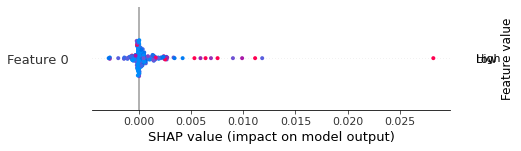

In [26]:
# visualize the first prediction's explanation using a summary plot

shap.summary_plot(shap_values[0][0], X_mitbihl_train[0])

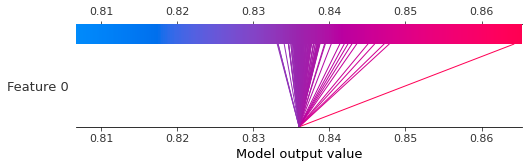

In [30]:
# visualize the first prediction's explanation using a decision plot

shap.decision_plot(explainer.expected_value[0], shap_values[0][0], X_mitbihl_train[0])

(187, 1)


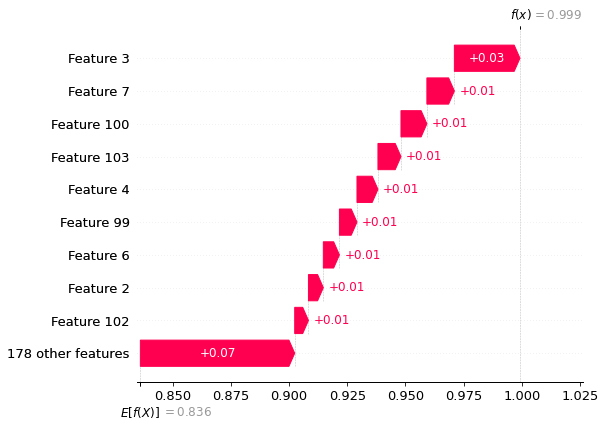

In [62]:
# visualize the first prediction's explanation using a waterfall plot

wf_shap_values = np.squeeze(shap_values[0][0], axis=1)
exp = shap.Explanation(wf_shap_values, base_values=explainer.expected_value[0])
print(shap_values[0][0].shape)
shap.waterfall_plot(exp[:])

## 3.5 Decision Tree

A decision tree will allow for a more transparent explanation of the model, as the followed path can just be printed out. In order to get the required data for the conditional statements another algorithm is required to convert the voltage data into the necessary summerized data. This section creates a proof-of-concept decision tree and will regard the creation of the previously mentioned algorithm as out of scope.

This resource was used in estimating the thresholds.
https://ecgwaves.com/topic/ecg-normal-p-wave-qrs-complex-st-segment-t-wave-j-point/

The followed path is outlined in red. (This flowchart is created by M. Mirtajaddini, MD as part of "A new algorithm for arrhythmia interpretation" https://doi.org/10.1016/j.jelectrocard.2017.05.007)
![Flowchart](data/DT_flowchart_path.png)

In [1]:
# import the necessary libraries

import pandas as pd

In [2]:
d = {'I_QRS_width': [90], 'I_R_height': [1.9], 'I_R_width': [30], 'I_P_height': [0.20], 'I_PR_interval': [150]}

df = pd.DataFrame(data=d)
df.head(1)

,I_QRS_width,I_R_height,I_R_width,I_P_height,I_PR_interval
0,90,1.9,30,0.2,150


In [3]:
def ecg_interpretation(row):
    string = ''
    
    # if QRS is observed
    if (row.I_QRS_width > 10):
        string += 'The QRS is observable.\n'
        
        # if QRS rate is too high
        if (row.I_QRS_width > 100):
            string += 'The QRS rate of {}ms is too high.\n'.format(row.I_QRS_width)
            # Not implemented
        
        # if QRS rate is not too high
        else:
            string += 'The QRS rate of {}ms is acceptable.\n'.format(row.I_QRS_width)
            
            # if P wave is visible
            if (row.I_P_height > 0.03):
                string += 'The P wave is visible.\n'
                
                # if PR interval is normal
                if (row.I_PR_interval > 120 and row.I_PR_interval < 220):
                    string += 'The interval lenght of {}ms is acceptable.\n'.format(row.I_PR_interval)
                    string += '\nThe prediction is: healthy heart.'
                    
                # if PR interval not normal
                else:
                    string += 'The interval lenght of {}ms is not in acceptable bounds.\n'.format(row.I_PR_interval)
                
            # if P wave is not visible
            else:
                string += 'The P wave is NOT visible.\n'
                # Not implemented
    
    # if QRS is not observed
    else:
        string += 'The QRS is NOT observable.\n'
        # Not implemented
        
    
    return string

In [4]:
outcome = ecg_interpretation(df.iloc[0])
print(outcome)

The QRS is observable.
The QRS rate of 90.0ms is acceptable.
The P wave is visible.
The interval lenght of 150.0ms is acceptable.

The prediction is: healthy heart.
